The goal of this notebook is to do some preliminary exploration of the BN10 metabolomics data.

Specifically, I need to answer:

- which secondary bile acids do we have data for?
- which SCFAs do we have data for?

And, for each:

- what's the variation in amounts of each metabolite across people?
- how does a person's rank on a per-metabolite basis compare with their rank on a all-metabolite basis?
    - i.e. if I were to rank the donors by butyrate, how well do those rankings corresponding to ranking them by all SCFAs?

A future note: we may want to compare ratio of primary to secondary bile acids (as a better measure of secondary bile acid "production")

In [1]:
import pandas as pd
import numpy as np
import feather

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('white')
sns.set_palette('muted')

In [2]:
ftidy = '../../data/clean/bn10.tidy_metabolomics.feather'
df = feather.read_dataframe(ftidy)

In [3]:
df.shape

(8574995, 16)

In [4]:
df.head()

,compound,mz,rt,method,compound_id,hmdb_id,metabolite,n_members,cluster_name,cluster_number,cluster_major_ion,potential_adduct,sample,intensity,donor,sample_number
0,C18n_cmp.QI01,355.2424,7.76,C18n,cmp.QI01,Internal Standard,PGE2-d4,3,PGE2-d4__,759,Major,None,aa.0163,289686.0,aa,0163
1,C18n_cmp.QI02,313.2382,9.83,C18n,cmp.QI02,HMDB04705,12_13-diHOME,3,12_13-diHOME__,495,Major,None,aa.0163,191459.0,aa,0163
2,C18n_cmp.QI03,313.2382,10.02,C18n,cmp.QI03,HMDB04704,9_10-diHOME,2,9_10-diHOME__,855,Major,None,aa.0163,196193.0,aa,0163
3,C18n_cmp.QI04,295.2274,11.29,C18n,cmp.QI04,HMDB04667,13-HODE,3,13-HODE__,533,Major,None,aa.0163,82445.0,aa,0163
4,C18n_cmp.QI05,335.2226,11.00,C18n,cmp.QI05,None,5_6 diHETE,1,5_6 diHETE__,5202,Unclustered,None,aa.0163,32595.0,aa,0163


In [5]:
# Grab all named metabolites
mtabs = df['metabolite'].dropna().unique().tolist()
mtabs = [i.lower() for i in mtabs]
len(mtabs)

460

# SCFAs

From wikipedia, the [short chain fatty acids](https://en.wikipedia.org/wiki/Short-chain_fatty_acid) are:

![](scfas.png)

In [6]:
scfas = ['formic acid', 'acetic acid', 'propionic acid', 
         'butyric acid', 'isobutyric acid', 'valeric acid',
         'isovaleric acid', 
         'methanoic acid', 'ethanoic acid', 'propanoic acid',
         'butanoic acid', '2-methylpropanoic acid',
         'pentanoic acid', '3-methylbutanoic acid',
         'formate', 'acetate', 'propionate',
         'butyrate', 'isobutyrate', 'valerate', 'isovalerate',
         'methanoate', 'ethanoate', 'propanoate', 'butanoate',
         '2-methylpropanoate', 'pentanoate', '3-methyldbutanoate']
[i for i in scfas if i in mtabs]

['propionate', 'butyrate', 'isovalerate']

Let's manually check a few of these common endings to make sure I'm not missing things based on incomplete/fuzzy matches...

In [7]:
[i for i in mtabs if 'oate' in i]

['caproate',
 'heptanoate',
 '2-hydroxyoctanoate',
 '3-hydroxydecanoate',
 'dodecanoate',
 'dodecanedioate',
 'pentadecanoate',
 'tetradecanedioate',
 '10-heptadecenoate',
 'heptadecanoate',
 '2-hydroxyhexadecanoate',
 'hexadecanedioate',
 '10-nonadecenoate',
 'nonadecanoate',
 'eicosapentaenoate',
 'eicosatrienoate',
 'eicosadienoate',
 'eicosenoate',
 'docosahexaenoate',
 'docosapentaenoate',
 '13-docosenoate',
 'eicosanedioate',
 'benzoate']

In [8]:
[i for i in mtabs if 'oic' in i]

['4-guanidinobutanoic acid']

In [9]:
[i for i in mtabs if 'acid' in i]

['azelaic acid',
 'gaba/alpha-aminoisobutyric acid',
 'anthranilic acid',
 'kynurenic acid',
 '3-hydroxyanthranilic acid',
 'mevalonic acid',
 'pipecolic acid',
 '5-aminolevulinic acid',
 'pyroglutamic acid',
 '4-guanidinobutanoic acid',
 'beta-guanidinopropionic acid',
 'guanidoacetic acid',
 'imidazoleacetic acid',
 'm-coumaric acid',
 'urocanic acid']

In [10]:
[i for i in mtabs if 'methyl' in i]

['17-methylstearate',
 'dimethylurate',
 '3-methyladipate/pimelate',
 'tetrahydro-1-methyl-beta-carboline-3-carboxylate',
 'dimethylglycine',
 '1-methylhistamine',
 'trimethylamine-n-oxide',
 '1-methylnicotinamide',
 'methylthioadenosine',
 '1-methyladenosine',
 '1-methylguanosine/2-o-methylguanosine',
 '1,2,4-trimethylbenzene',
 "2'-o-methyladenosine/3'-o-methyladenosine",
 '3-methylhistidine',
 '5-methylcytidine',
 '5-methylcytosine']

In [12]:
#[i for i in mtabs if 'ate' in i]

Okay, I feel pretty confident then that those are the only three we have. Let's go with these first, and think about how we'll want to move forward for the others...

# Secondary bile acids

From Sean's email:

```
# primary conjugated
# glycocholate: 50, taurocholate: 55
# glycochenodeoxycholate: 47, taurochenodeoxycholate: 52

# primary unconjugated
# chenodeoxycholate: 41, cholate: 45

# secondary unconjugated
# lithocholate: 40, deoxycholate: 42

# secondary conjugated 
# glycolithocholate: 46, taurolithocholate: 51
# glycodeoxycholate: 48, taurodeoxycholate: 53

# OTHERS
# ketodeoxycholate: 43
# alpha-muricholate: 44
# glycoursodeoxycholate: 49
# taurohyodeoxycholate/tauroursodeoxycholate: 54
```

In [85]:
bile_acids = ['lithocholate', 'deoxycholate', 
              'glycolithocholate', 'taurolithocholate',
              'glycodeoxycholate', 'taurodeoxycholate']
[i for i in bile_acids if i in mtabs]

['lithocholate',
 'deoxycholate',
 'taurolithocholate',
 'glycodeoxycholate',
 'taurodeoxycholate']

In [86]:
[i for i in mtabs if 'glyco' in i]

['glycochenodeoxycholate',
 'glycodeoxycholate',
 'glycoursodeoxycholate',
 'glycocholate',
 'glycocholate-d4',
 '3-4-dihydroxyphenylglycol',
 'glycodeoxycholate/glycochenodeoxycholate']

In [87]:
# Check the method used for these (they separate on one but not the other)
check_method = ['glycodeoxycholate/glycochenodeoxycholate', 'glycodeoxycholate']
df[['method', 'metabolite']].drop_duplicates().query('metabolite == @check_method')

,method,metabolite
58,C18-neg,glycodeoxycholate
2370641,HILIC-neg,glycodeoxycholate/glycochenodeoxycholate


Yes, the C18-neg column is better for the bile acids. Here's an example of a primary (glycochenodeoxycholate) and secondary (glycodeoxycholate) which don't separate on the HILIC column but do separate on the C18-neg.

The major secondary bile acids are deoxycholic and lithocholic acid (from [wikipedia](https://en.wikipedia.org/wiki/Bile_acid#Production)). We have both of these woohoo!

In [88]:
# For later analysis (at bottom), primary bile acids
primary_bile = ['cholate', 'chenodeoxycholate']
[i for i in primary_bile if i in mtabs]

['cholate', 'chenodeoxycholate']

# Summary of data

We have the following SCFAs: ['propionate', 'butyrate', 'isovalerate']

And secondary bile acids: ['lithocholate', 'deoxycholate', 'taurolithocholate', 'glycodeoxycholate', 'taurodeoxycholate']

In [89]:
scfas = ['propionate', 'butyrate', 'isovalerate']
bile_acids = ['lithocholate', 'deoxycholate', 'taurolithocholate', 'glycodeoxycholate', 'taurodeoxycholate']
molecules = scfas + bile_acids + primary_bile

df_allsamples = df.query('metabolite == @molecules')

### All samples

Let's plot the distribution of values for all samples, including duplicates from donors.

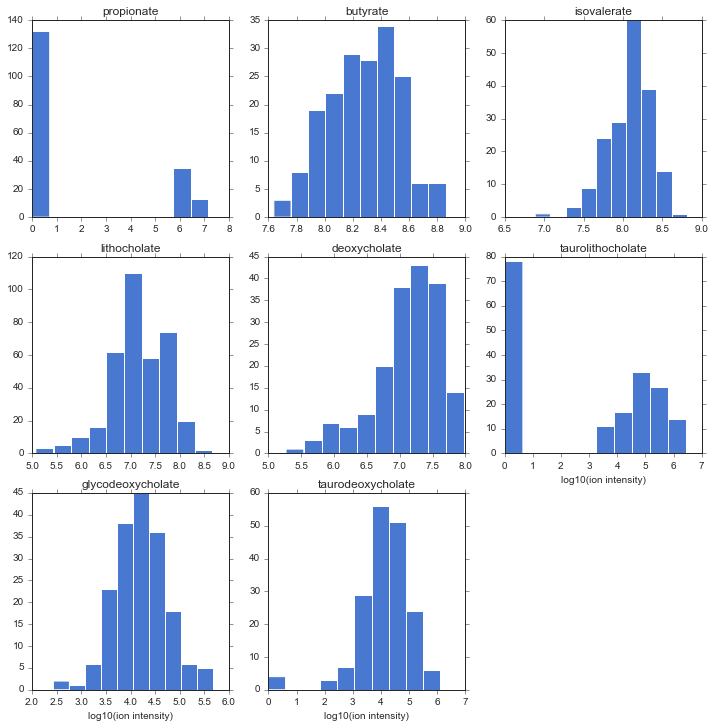

In [90]:
fig, ax = plt.subplots(3, 3, figsize=(12, 12))
ax = ax.flatten()

i = 0
for s in scfas + bile_acids:
    subdf = df_allsamples.query('metabolite == @s')
    ax[i].hist(np.log10(subdf['intensity'].dropna() + 1))
    #ax[i].hist(subdf['intensity'])
    ax[i].set_title(s)
    if i >= 5:
        ax[i].set_xlabel('log10(ion intensity)')
    i += 1
ax[i].set_axis_off()


### Average per donor

Okay, that was plotting all values, including duplicates from the same patient. What if we plot the average value per person? And maybe the std within people?

First: how many of these measurements do we have per donor?

In [91]:
df_allsamples.head()

,method,compound,mz,rt,hmdb_id,metabolite,sample,intensity,donor,sample_number
50,C18-neg,cmp.QI46,375.289705,12.073733,HMDB00761,lithocholate,0001-0163,12237963.0,0001,0163
51,C18-neg,cmp.QI47,391.284828,10.197183,HMDB00518,chenodeoxycholate,0001-0163,184061.0,0001,0163
52,C18-neg,cmp.QI48,391.284822,10.403383,HMDB00626,deoxycholate,0001-0163,25305167.0,0001,0163
56,C18-neg,cmp.QI52,407.279719,8.787333,HMDB00619,cholate,0001-0163,150576.0,0001,0163
58,C18-neg,cmp.QI54,448.306103,9.132667,HMDB00631,glycodeoxycholate,0001-0163,2969.0,0001,0163


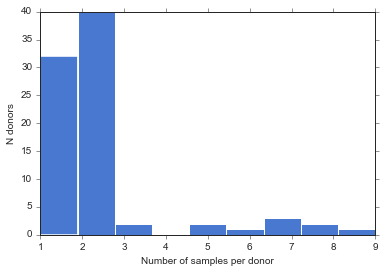

In [92]:
plt.hist(
    df_allsamples[['donor', 'sample_number']].drop_duplicates().groupby('donor').size(),
    bins=9)
plt.xlabel('Number of samples per donor')
plt.ylabel('N donors')

In [93]:
df_allsamples[['donor', 'sample_number']].drop_duplicates().groupby('donor').size().value_counts(sort=False)

1    32
2    40
3     2
5     2
6     1
7     3
8     2
9     1
dtype: int64

Okay, so for the 40 donors with only two samples, the best we can do is plot the difference between the two measurements.

For the donors with more than 2 samples, we can do mean vs. std. Let's do this first because it's easier to code up.

In [94]:
tmp = df_allsamples[['donor', 'sample_number']].drop_duplicates().groupby('donor').size()
tmp = tmp.reset_index(name='n_samples')
multi_donors = tmp[tmp['n_samples'] > 2]['donor'].values.tolist()
tmp[tmp['n_samples'] > 2]

,donor,n_samples
4,0026,5
12,0044,9
13,0051,7
14,0052,6
26,0074,7
27,0077,8
31,0082,8
33,0088,7
59,0131,5
69,0481,3


In [95]:
# Get the mean intensity per donor for metabolites
df_stats = pd.merge(
    df_allsamples
        .query('donor == @multi_donors')
        .groupby(['donor', 'metabolite'])
        .mean()
        ['intensity']
        .reset_index(name='mean'), 
    df_allsamples
        .query('donor == @multi_donors')
        .groupby(['donor', 'metabolite'])
        .std()
        ['intensity']
        .reset_index(name='std')
)
df_stats.head()

,donor,metabolite,mean,std
0,0026,butyrate,353411777.2,1.906260e+08
1,0026,chenodeoxycholate,2374302.0,2.348560e+06
2,0026,cholate,5306647.6,5.020194e+06
3,0026,deoxycholate,35121766.2,1.548221e+07
4,0026,glycodeoxycholate,14363.8,7.371015e+03


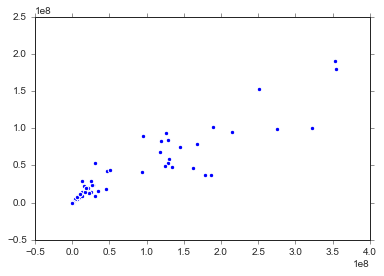

In [96]:
plt.scatter(df_stats['mean'], df_stats['std'])

/Users/claire/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


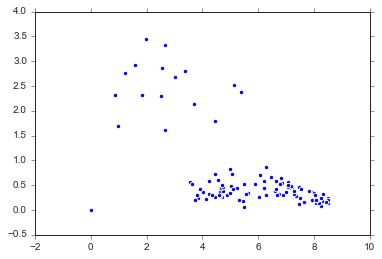

In [97]:
df_allsamples['log_intensity'] = np.log10(df_allsamples['intensity'] + 1)
df_stats = pd.merge(
    df_allsamples
        .query('donor == @multi_donors')
        .groupby(['donor', 'metabolite'])
        ['log_intensity']
        .mean()
        .reset_index(name='mean'), 
    df_allsamples
        .query('donor == @multi_donors')
        .groupby(['donor', 'metabolite'])
        ['log_intensity']
        .std()
        .reset_index(name='std')
)
plt.scatter(df_stats['mean'], df_stats['std'])

Eh, I always make these plots and then don't know what to do with them. Let's just do onwards with the mean values per donor!

In [98]:
df_mean = (df_allsamples
    .groupby(['donor', 'metabolite', ])
    ['intensity']
    .mean()
    .reset_index(name='mean_intensity')
)
df_mean.head()

,donor,metabolite,mean_intensity
0,0001,butyrate,282178200.0
1,0001,chenodeoxycholate,184061.0
2,0001,cholate,150576.0
3,0001,deoxycholate,25305167.0
4,0001,glycodeoxycholate,2969.0


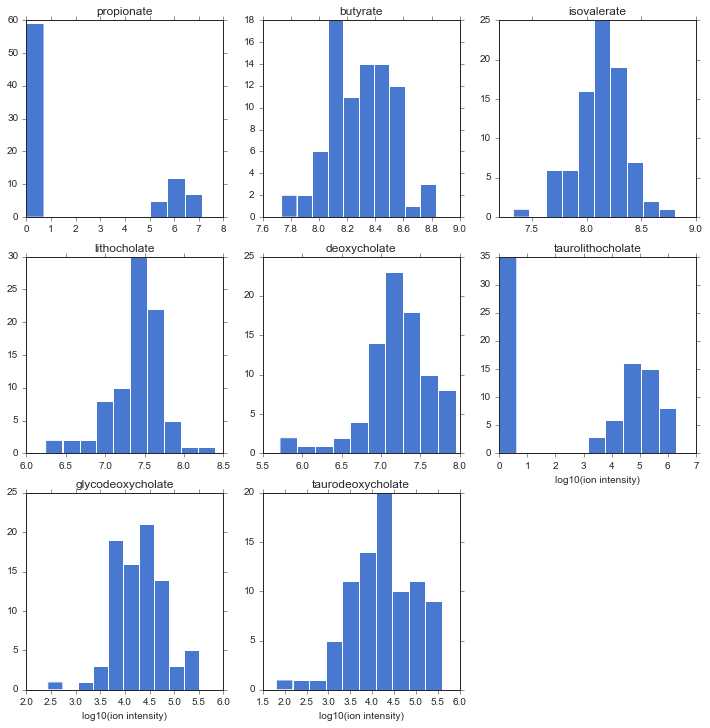

In [99]:
# Now plot the SCFAs and bile acids 
fig, ax = plt.subplots(3, 3, figsize=(12, 12))
ax = ax.flatten()

i = 0
molecules = scfas + bile_acids
for s in molecules:
    subdf = df_mean.query('metabolite == @s')
    ax[i].hist(np.log10(subdf['mean_intensity'].dropna() + 1))
    #ax[i].hist(subdf['intensity'])
    ax[i].set_title(s)
    if i >= 5:
        ax[i].set_xlabel('log10(ion intensity)')
    i += 1
ax[i].set_axis_off()

# Rank donors

Now, let's try to rank donors based on each of these metabolites

In [100]:
df_wide = df_mean.pivot(index='donor', columns='metabolite', values='mean_intensity')
df_wide.head()

metabolite,butyrate,chenodeoxycholate,cholate,deoxycholate,glycodeoxycholate,isovalerate,lithocholate,propionate,taurodeoxycholate,taurolithocholate
donor,,,,,,,,,,
0001,282178200.0,184061.0,150576.0,25305167.0,2969.0,404142340.0,4.337812e+07,0.0,7410.0,0.0
0005,673095277.0,5392116.0,14073265.0,69110129.0,52197.0,247042347.0,8.933960e+07,3303224.0,91009.0,827681.0
0014,384704917.0,2515267.0,1444762.0,88397995.0,69184.0,645391691.0,2.465874e+08,0.0,39939.0,0.0
0025,134973918.5,330303.5,1021682.5,27776132.0,25679.5,227609496.5,5.762863e+07,0.0,19397.0,0.0
0026,353411777.2,2374302.0,5306647.6,35121766.2,14363.8,178770944.2,4.654574e+07,293042.0,21380.4,11383.6


In [101]:
# Convert abundances to ranks
# dense: like ‘min’, but rank always increases by 1 between group
df_ranks = df_wide.rank(axis=0, method='dense')
df_ranks.head()

metabolite,butyrate,chenodeoxycholate,cholate,deoxycholate,glycodeoxycholate,isovalerate,lithocholate,propionate,taurodeoxycholate,taurolithocholate
donor,,,,,,,,,,
0001,61.0,38.0,6.0,55.0,3.0,82.0,66.0,1.0,23.0,1.0
0005,83.0,78.0,76.0,81.0,66.0,74.0,81.0,21.0,72.0,44.0
0014,78.0,70.0,54.0,83.0,72.0,83.0,83.0,1.0,58.0,1.0
0025,21.0,49.0,51.0,59.0,51.0,72.0,77.0,1.0,44.0,1.0
0026,75.0,69.0,65.0,66.0,34.0,62.0,71.0,3.0,47.0,8.0


In [102]:
# Re-melt into tidy form
tidy_ranks = pd.melt(df_ranks.reset_index(), id_vars='donor')
tidy_ranks.head()

,donor,metabolite,value
0,0001,butyrate,61.0
1,0005,butyrate,83.0
2,0014,butyrate,78.0
3,0025,butyrate,21.0
4,0026,butyrate,75.0


How many total donors are there?

In [103]:
df_allsamples['donor'].unique().shape

(83,)

## SCFAs

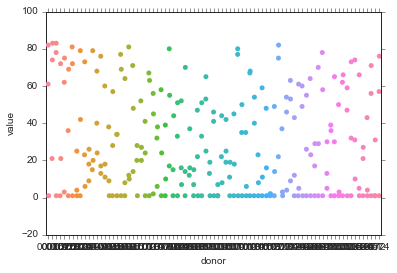

In [104]:
# Plot each donor's ranks for all the metabolites
sns.stripplot(data=tidy_ranks.query('metabolite == @scfas'), x='donor', y='value')

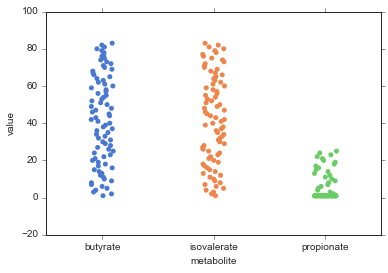

In [105]:
sns.stripplot(data=tidy_ranks.query('metabolite == @scfas'), x='metabolite', y='value')

Note: looks like lots of donors have zero propionate!

In [106]:
# Re-do stripplot, but order in descending mean rank
donor_order = (tidy_ranks
    .query('metabolite == @scfas')
    .groupby('donor')
    .mean()
    .reset_index()
    .sort_values(by='value')
    ['donor']
    )

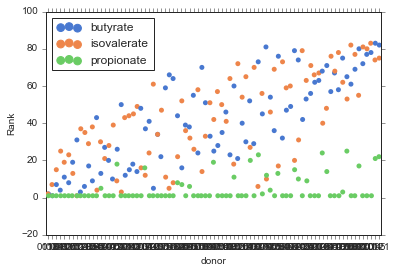

In [107]:
sns.stripplot(
    data=tidy_ranks.query('metabolite == @scfas'), 
    x='donor', y='value',
    order=donor_order,
    hue='metabolite').legend(loc='upper left')
plt.ylabel('Rank')

In [108]:
df_mean['log_intensity'] = np.log10(df_mean['mean_intensity'] + 1.0)

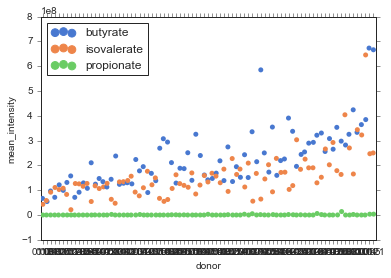

In [109]:
# Order donors by their average rank, but instead plot the actual values
sns.stripplot(
    data=df_mean.query('metabolite == @scfas'), 
    x='donor', y='mean_intensity',
    order=donor_order,
    hue='metabolite').legend(loc='upper left')


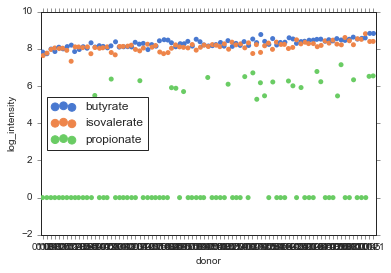

In [110]:
sns.stripplot(
    data=df_mean.query('metabolite == @scfas'), 
    x='donor', y='log_intensity',
    order=donor_order,
    hue='metabolite').legend(loc='center left')


## Bile acids

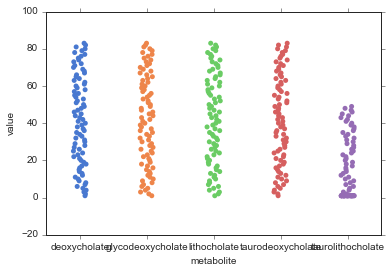

In [111]:
# Plot each donor's ranks for all the metabolites
sns.stripplot(data=tidy_ranks.query('metabolite == @bile_acids'), x='metabolite', y='value')

In [112]:
# Re-do stripplot, but order in descending mean rank
donor_order_bile = (tidy_ranks
    .query('metabolite == @bile_acids')
    .groupby('donor')
    .mean()
    .reset_index()
    .sort_values(by='value')
    ['donor']
    )

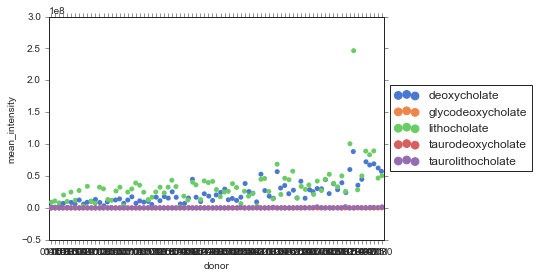

In [113]:
# Order donors by their average rank, but instead plot the actual values
sns.stripplot(
    data=df_mean.query('metabolite == @bile_acids'), 
    x='donor', y='mean_intensity',
    order=donor_order_bile,
    hue='metabolite')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


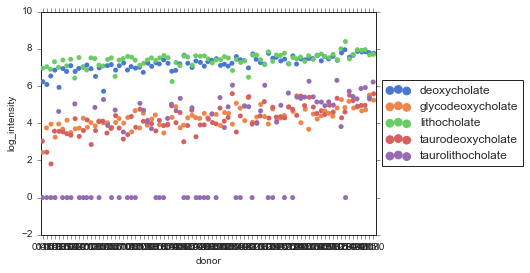

In [114]:
sns.stripplot(
    data=df_mean.query('metabolite == @bile_acids'), 
    x='donor', y='log_intensity',
    order=donor_order_bile,
    hue='metabolite')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


## Ranks in SCFAs vs. bile acids

Let's plot donor rank in SCFA production vs. donor rank in bile acid production

In [115]:
rank_comp = pd.merge(
    tidy_ranks
        .query('metabolite == @scfas')
        .groupby('donor')
        .mean()
        .reset_index()
        .rename(columns={'value': 'scfas'}),
    tidy_ranks
        .query('metabolite == @bile_acids')
        .groupby('donor')
        .mean()
        .reset_index()
        .rename(columns={'value': 'bile_acids'})
    )

In [116]:
rank_comp.head()

,donor,scfas,bile_acids
0,0001,48.000000,29.6
1,0005,59.333333,68.8
2,0014,54.000000,59.4
3,0025,31.333333,46.4
4,0026,46.666667,45.2


In [117]:
# There are 83 donors, but because propionate is so
# frequently absent, our max mean rank is 60 and 75
rank_comp.max()

donor         574.000000
scfas          59.666667
bile_acids     72.000000
dtype: float64

There are 83 donors, but since some metabolites are often absent, the max mean rank is 60 for SCFAs and 75 for bile acids. If we want the top 10% of donors in both, that would be rank ~54 for SCFAs and ~66 for bile acids.

Are there any donors in the top 10% of both?

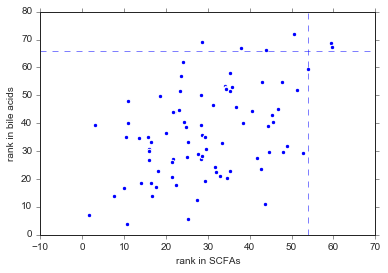

In [118]:
plt.scatter(rank_comp['scfas'], rank_comp['bile_acids'])
plt.xlabel('rank in SCFAs')
plt.ylabel('rank in bile acids')

scfa_cutoff = 54
bile_cutoff = 66

plt.axvline(scfa_cutoff, alpha=0.5, linestyle='--')
plt.axhline(bile_cutoff, alpha=0.5, linestyle='--')

Yep, there are two donors here! Let's see who these are, and how many samples we have for each.

In [119]:
rank_comp.sort_values(by='scfas', ascending=False).head()

,donor,scfas,bile_acids
57,0121,59.666667,67.4
1,0005,59.333333,68.8
2,0014,54.000000,59.4
47,0110,52.666667,29.2
6,0030,51.333333,52.0


### Investigate these top donors

Let's just do a sanity check and see how much we trust the data from these donors.

In [120]:
top_donors = ['0005', '0121']
df_top = df_allsamples.query('donor == @top_donors').query('metabolite == @molecules')
#df_top.head()

In [121]:
df_top[['donor', 'sample']].drop_duplicates()

,donor,sample
13220,0005,0005-0140
1725320,0121,0121-0008


Ah, damn. We only have one measurement per each of these donors...

# Quick sanity check

What if we had taken the max value per donor, rather than the mean? Just wondering if the donors with multiple samples got shafted because we sampled them better...

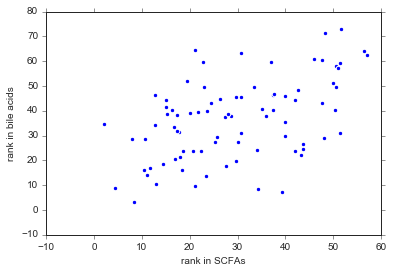

In [122]:
# Get max value per donor
df_max = (df_allsamples
    .groupby(['donor', 'metabolite', ])
    ['intensity']
    .max()
    .reset_index(name='max_intensity')
)

# Pivot to wide form
df_wide_max = df_max.pivot(index='donor', columns='metabolite', values='max_intensity')

# Convert to ranks
df_ranks_max = df_wide_max.rank(axis=0, method='dense')

# Re-melt into tidy form
tidy_ranks_max = pd.melt(df_ranks_max.reset_index(), id_vars='donor')

# Rank in SCFAs vs bile acids
rank_comp_max = pd.merge(
    tidy_ranks_max
        .query('metabolite == @scfas')
        .groupby('donor')
        .mean()
        .reset_index()
        .rename(columns={'value': 'scfas'}),
    tidy_ranks_max
        .query('metabolite == @bile_acids')
        .groupby('donor')
        .mean()
        .reset_index()
        .rename(columns={'value': 'bile_acids'})
    )

plt.scatter(rank_comp_max['scfas'], rank_comp_max['bile_acids'])
plt.xlabel('rank in SCFAs')
plt.ylabel('rank in bile acids')

In [123]:
rank_comp_max.sort_values(by='scfas', ascending=False).head()

,donor,scfas,bile_acids
57,0121,57.000000,62.4
1,0005,56.333333,64.0
12,0044,51.666667,73.0
26,0074,51.333333,59.2
47,0110,51.333333,31.2


Ok no, that's fine - the top two donors are still 0121 and 0005.

# Ta da!

Two donors are selected!

# Next steps

For this (liver cirrhosis donor selection):

- check sample availability for these two donors
- read Jas's liver papers to see if we should up/down-weight some of these molecules
- consider: quantifying SCFA-producing bugs (abundance from 16S data), see if same top donors come out
    - http://mbio.asm.org/content/5/2/e00889-14.full
    - Table S1: http://www.bloodjournal.org/content/bloodjournal/suppl/2018/04/13/blood-2018-01-828996.DC1/blood-2018-01-828996-1.pdf


For group meeting

- make figure explaining the different models
- write up these analyses into a figure or two
- present the IBD case study idea
- brainstorm with the team about how to "score" donors and/or "define healthy"

# Ratio of primary to secondary bile acids

Rather than looking at total amount of secondary, we should actually try to measure conversion of primary into secondary bile acids.

I'll use the same ratios as in Kakiyama et al (J Hepatol. 2013 May ; 58(5): 949–955. doi:10.1016/j.jhep.2013.01.003.)

LCA / CDCA   
DCA / CA   
LCA + DCA / CDCA + CA

LCA = lithocholic acid    
CDCA = chenodeoxycholic acid     
DCA = deoxycholic acid     
CA = cholic acid     


In [124]:
bile_acids

['lithocholate',
 'deoxycholate',
 'taurolithocholate',
 'glycodeoxycholate',
 'taurodeoxycholate']

In [125]:
primary_bile

['cholate', 'chenodeoxycholate']

In [126]:
secondary_bile = ['lithocholate', 'deoxycholate']

In [127]:
# Re-do stripplot, but just for primary bile acids
donor_order_primary = (tidy_ranks
    .query('metabolite == @primary_bile')
    .groupby('donor')
    .mean()
    .reset_index()
    .sort_values(by='value')
    ['donor']
    )

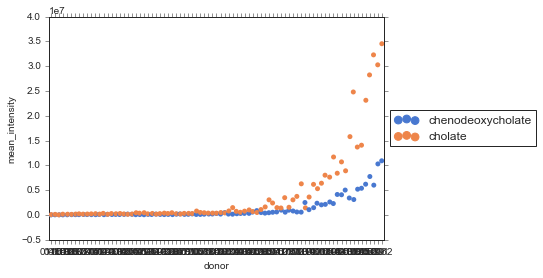

In [128]:
# Order donors by their average rank, but instead plot the actual values
sns.stripplot(
    data=df_mean.query('metabolite == @primary_bile'), 
    x='donor', y='mean_intensity',
    order=donor_order_primary,
    hue='metabolite')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


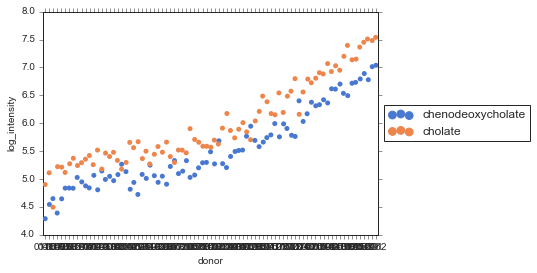

In [129]:
sns.stripplot(
    data=df_mean.query('metabolite == @primary_bile'), 
    x='donor', y='log_intensity',
    order=donor_order_primary,
    hue='metabolite')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


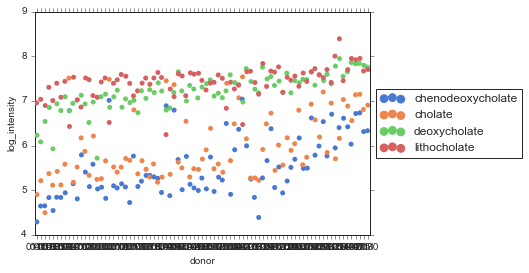

In [164]:
# How about all bile acids?
all_bile = primary_bile + ['lithocholate', 'deoxycholate']
sns.stripplot(
    data=df_mean.query('metabolite == @all_bile'), 
    x='donor', y='log_intensity',
    order=donor_order_bile,
    hue='metabolite')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


Hm, this is where I get stuck a bit: is it legit to add the primary bile acids and separately the secondary ones, and then divide to take the ratio? I'm not sure the units are comparable in that way (i.e. you can't just add them - esp the secondary ones, which vary in intensity). Unless you assume that they fly similarly, and so should ionize similarly and can just be added all together? Let's go with that and sanity check with someone later.

In [130]:
# LCA + DCA / CDCA + CA
tmp = []
for d, subdf in df_mean.groupby('donor'):
    total_primary = subdf.query('metabolite == @primary_bile').sum()['mean_intensity']
    total_secondary = subdf.query('metabolite == @secondary_bile').sum()['mean_intensity']
    tmp.append([d, total_primary, total_secondary])
bile_comp = pd.DataFrame(tmp, columns=['donor', 'total_primary', 'total_secondary'])
bile_comp['secondary_to_primary'] = bile_comp['total_secondary']/bile_comp['total_primary']

# LCA / CDCA
m2 = "lithocholate"
m1 = 'chenodeoxycholate'
col = m2 + '_' + m1
tmp_ratio = (df_mean
     .query('(metabolite == @m2) | metabolite == @m1')
     .pivot(index='donor', columns='metabolite', values='mean_intensity')
)
tmp_ratio[col] = tmp_ratio[m2] / tmp_ratio[m1]
bile_comp = pd.merge(bile_comp, tmp_ratio, left_on='donor', right_index=True)

# DCA / CA
m2 = "deoxycholate"
m1 = 'cholate'
col = m2 + '_' + m1
tmp_ratio = (df_mean
     .query('(metabolite == @m2) | metabolite == @m1')
     .pivot(index='donor', columns='metabolite', values='mean_intensity')
)
tmp_ratio[col] = tmp_ratio[m2] / tmp_ratio[m1]
bile_comp = pd.merge(bile_comp, tmp_ratio, left_on='donor', right_index=True)
bile_comp.head()


,donor,total_primary,total_secondary,secondary_to_primary,chenodeoxycholate,lithocholate,lithocholate_chenodeoxycholate,cholate,deoxycholate,deoxycholate_cholate
0,0001,334637.0,6.868328e+07,205.247133,184061.0,4.337812e+07,235.672511,150576.0,25305167.0,168.055779
1,0005,19465381.0,1.584497e+08,8.140079,5392116.0,8.933960e+07,16.568561,14073265.0,69110129.0,4.910739
2,0014,3960029.0,3.349853e+08,84.591640,2515267.0,2.465874e+08,98.036253,1444762.0,88397995.0,61.185161
3,0025,1351986.0,8.540477e+07,63.169860,330303.5,5.762863e+07,174.471764,1021682.5,27776132.0,27.186657
4,0026,7680949.6,8.166751e+07,10.632476,2374302.0,4.654574e+07,19.603970,5306647.6,35121766.2,6.618447


In [131]:
# Get back into tidy format
bile_tidy = bile_comp.melt(id_vars='donor')
bile_tidy.head()

,donor,variable,value
0,0001,total_primary,334637.0
1,0005,total_primary,19465381.0
2,0014,total_primary,3960029.0
3,0025,total_primary,1351986.0
4,0026,total_primary,7680949.6


In [132]:
donor_order_ratio = bile_comp.sort_values(by='secondary_to_primary')['donor']

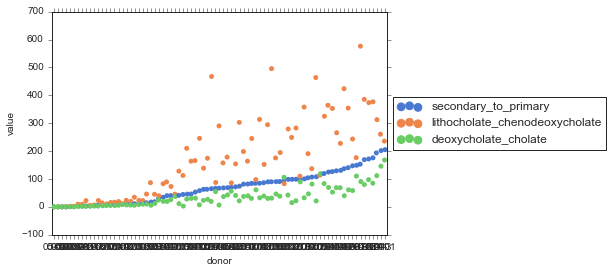

In [133]:
ratios = ['secondary_to_primary', 'lithocholate_chenodeoxycholate', 'deoxycholate_cholate']
sns.stripplot(
    data=bile_tidy.query('variable == @ratios'), 
    x='donor', y='value',
    order=donor_order_ratio,
    hue='variable')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Hm, not really comfortable combining the bile acids together. Let's plot separately:

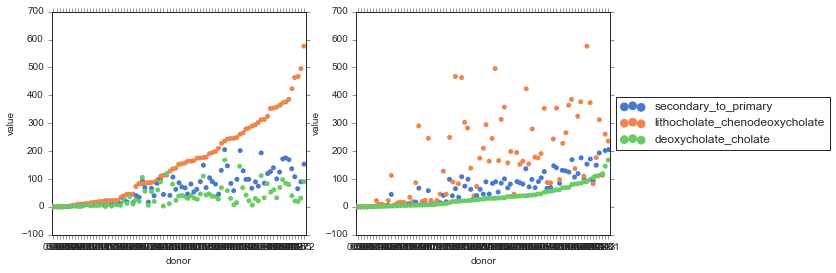

In [134]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

donor_order_ratio = bile_comp.sort_values(by='lithocholate_chenodeoxycholate')['donor']
sns.stripplot(
    data=bile_tidy.query('variable == @ratios'), 
    x='donor', y='value',
    order=donor_order_ratio,
    hue='variable', ax=ax[0])
ax[0].legend_.remove() #(loc='center left', bbox_to_anchor=(1.0, 0.5))

donor_order_ratio = bile_comp.sort_values(by='deoxycholate_cholate')['donor']
sns.stripplot(
    data=bile_tidy.query('variable == @ratios'), 
    x='donor', y='value',
    order=donor_order_ratio,
    hue='variable', ax=ax[1])
ax[1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Still doesn't look quite clean enough: the top ~5 litho/chenodeoxy producers have such a range of different deoxy/cholate ratios. I want them to match up better, but (again) don't trust the total secondary / total primary ratio (bc of non-comparable units).

Let's take the average of the two ratios.

In [135]:
bile_comp['ratio_avg'] = bile_comp[['lithocholate_chenodeoxycholate', 'deoxycholate_cholate']].mean(axis=1)

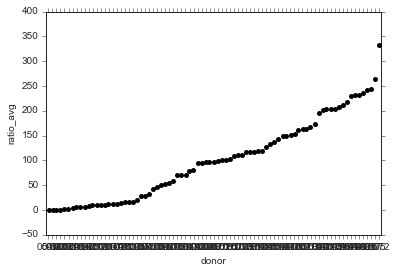

In [136]:
donor_order_ratio = bile_comp.sort_values(by='ratio_avg')['donor']
sns.stripplot(
    data=bile_comp, 
    x='donor', y='ratio_avg',
    order=donor_order_ratio,
    color='k')


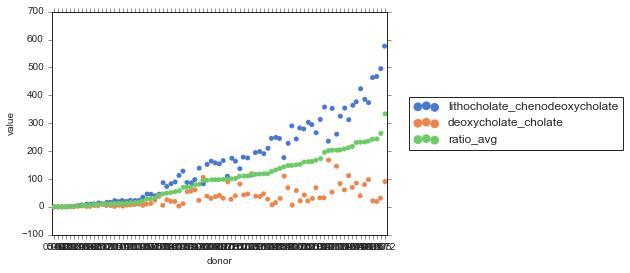

In [170]:
tmp = (bile_comp[['donor', 'lithocholate_chenodeoxycholate', 'deoxycholate_cholate', 'ratio_avg']]
    .melt(id_vars='donor')
)

sns.stripplot(data=tmp, x='donor', y='value', hue='variable', order=donor_order_ratio)
plt.gca().legend(loc='center left', bbox_to_anchor=(1.05, 0.5))

In [137]:
bile_comp.sort_values(by='ratio_avg', ascending=False).head()

,donor,total_primary,total_secondary,secondary_to_primary,chenodeoxycholate,lithocholate,lithocholate_chenodeoxycholate,cholate,deoxycholate,deoxycholate_cholate,ratio_avg
24,0072,190987.0,29260314.00,153.205789,24543.0,14140032.00,576.132991,166444.0,15120282.0,90.843058,333.488025
75,0505,517710.0,46649675.00,90.107734,65554.0,32489778.00,495.618543,452156.0,14159897.0,31.316397,263.467470
38,0097,518908.5,33831376.25,65.197190,52813.0,24689700.75,467.492866,466095.5,9141675.5,19.613310,243.553088
52,0115,99161.0,10719040.00,108.097337,19451.0,9018260.00,463.639916,79710.0,1700780.0,21.337097,242.488506
35,0092,256221.0,44031487.50,171.849643,68844.0,25725269.50,373.674823,187377.0,18306218.0,97.697252,235.686037


Ok so now how do I optimize for these three variables...? Rank them and then get the donor with the lowest mean rank? Oh no, we're just replacing the previous bile acids rank with this one!

In [138]:
bile_comp = bile_comp.sort_values(by='ratio_avg', ascending=True)
bile_comp['ratio_rank'] = range(1, bile_comp.shape[0] + 1)

In [139]:
bile_comp.sort_values(by='ratio_rank').tail()

,donor,total_primary,total_secondary,secondary_to_primary,chenodeoxycholate,lithocholate,lithocholate_chenodeoxycholate,cholate,deoxycholate,deoxycholate_cholate,ratio_avg,ratio_rank
35,0092,256221.0,44031487.50,171.849643,68844.0,25725269.50,373.674823,187377.0,18306218.0,97.697252,235.686037,79
52,0115,99161.0,10719040.00,108.097337,19451.0,9018260.00,463.639916,79710.0,1700780.0,21.337097,242.488506,80
38,0097,518908.5,33831376.25,65.197190,52813.0,24689700.75,467.492866,466095.5,9141675.5,19.613310,243.553088,81
75,0505,517710.0,46649675.00,90.107734,65554.0,32489778.00,495.618543,452156.0,14159897.0,31.316397,263.467470,82
24,0072,190987.0,29260314.00,153.205789,24543.0,14140032.00,576.132991,166444.0,15120282.0,90.843058,333.488025,83


In [140]:
rank_comp_2 = pd.merge(
    tidy_ranks
        .query('metabolite == @scfas')
        .groupby('donor')
        .mean()
        .reset_index()
        .rename(columns={'value': 'scfas'}),
    bile_comp,
    left_on='donor',
    right_on='donor'
    )

In [141]:
rank_comp_2.head()

,donor,scfas,total_primary,total_secondary,secondary_to_primary,chenodeoxycholate,lithocholate,lithocholate_chenodeoxycholate,cholate,deoxycholate,deoxycholate_cholate,ratio_avg,ratio_rank
0,0001,48.000000,334637.0,6.868328e+07,205.247133,184061.0,4.337812e+07,235.672511,150576.0,25305167.0,168.055779,201.864145,69
1,0005,59.333333,19465381.0,1.584497e+08,8.140079,5392116.0,8.933960e+07,16.568561,14073265.0,69110129.0,4.910739,10.739650,15
2,0014,54.000000,3960029.0,3.349853e+08,84.591640,2515267.0,2.465874e+08,98.036253,1444762.0,88397995.0,61.185161,79.610707,36
3,0025,31.333333,1351986.0,8.540477e+07,63.169860,330303.5,5.762863e+07,174.471764,1021682.5,27776132.0,27.186657,100.829211,45
4,0026,46.666667,7680949.6,8.166751e+07,10.632476,2374302.0,4.654574e+07,19.603970,5306647.6,35121766.2,6.618447,13.111208,19


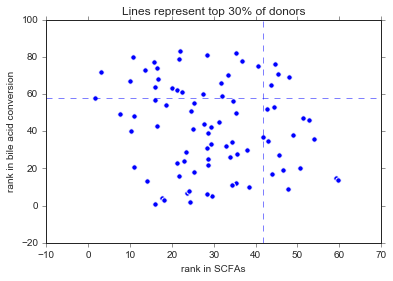

In [154]:
plt.scatter(rank_comp_2['scfas'], rank_comp_2['ratio_rank'], s=30)
plt.xlabel('rank in SCFAs')
plt.ylabel('rank in bile acid conversion')

percent_cutoff = 0.70
scfa_cutoff = percent_cutoff * rank_comp_2['scfas'].max()
bile_cutoff = percent_cutoff * rank_comp_2['ratio_rank'].max()

plt.axvline(scfa_cutoff, alpha=0.5, linestyle='--')
plt.axhline(bile_cutoff, alpha=0.5, linestyle='--')

plt.title('Lines represent top 30% of donors')

In [174]:
cols = ['donor', 'scfas', 'ratio_rank', 'lithocholate_chenodeoxycholate', 'deoxycholate_cholate']
rank_comp_2.query('scfas >= @scfa_cutoff').query('ratio_rank >= @bile_cutoff')[cols]

,donor,scfas,ratio_rank,lithocholate_chenodeoxycholate,deoxycholate_cholate
0,0001,48.000000,69,235.672511,168.055779
25,0073,43.666667,65,294.739087,30.270540
50,0113,45.333333,71,260.625739,145.863071
82,0574,44.666667,76,376.693820,84.863549


Side note: maybe the reason there *was* a correlation with SCFAs when I did just total amount of secondary bile acids vs. the ratio of secondary to primary is that both SCFAs and bile acids are correlated with something else in stool (e.g. amount of stool, transit time, etc).

So when I normalize the secondary bile acids to the primary bile acids, I get rid of that correlation. So maybe it is okay after all.

Would be great to have a way to normalize SCFAs - like if I could somehow measure the total amount of fiber or something, that would be nice.